In [12]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
%config InlineBackend.figure_format = 'svg'

In [14]:
df = pd.read_csv('all_combined.csv')

In [15]:
df.head(1)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920


In [16]:
df.columns = df.columns.str.strip()

In [17]:
df.columns = df.columns.str.lower()

In [18]:
df.rename(columns = {'c/a':'ca'},inplace=True)

In [19]:
df.head(1)

,ca,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920


In [20]:
df['turnstile'] = df.ca+df.unit+df.scp

In [21]:
df.head(1)

,ca,unit,scp,station,linename,division,date,time,desc,entries,exits,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920,A002R05102-00-00


In [22]:
cols = list(df.columns)

In [23]:
cols.insert(0,(cols.pop(cols.index('turnstile'))))

In [24]:
df2 = df[cols]

In [25]:
df2.turnstile.nunique()

4994

In [26]:
df2.head(3)

,turnstile,ca,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002R05102-00-00,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920
1,A002R05102-00-00,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,07:00:00,REGULAR,6889299,2335936
2,A002R05102-00-00,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,11:00:00,REGULAR,6889364,2336038


In [27]:
df2['datetime'] = pd.to_datetime(df2.date + ' ' + df.time,
                                format = '%m/%d/%Y %H:%M:%S')

<ipython-input-27-d47dbb398247>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['datetime'] = pd.to_datetime(df2.date + ' ' + df.time,


In [28]:
df2.head(1)

,turnstile,ca,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime
0,A002R05102-00-00,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920,2018-12-29 03:00:00


In [29]:
df2.drop(df2.loc[df2['desc']=='RECOVR AUD'].index, inplace=True)

/Users/michaelharnett/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
df2.desc.value_counts()

REGULAR    2658197
Name: desc, dtype: int64

In [23]:
dates_list = ['01/01/2019', '01/31/2019', '02/28/2019','03/31/2019','04/30/2019','05/31/2019',
              '06/30/2019','07/31/2019','08/31/2019','9/30/2019','10/31/2019','11/30/2019','12/31/2019']

In [50]:
df2[df2.isin({'date':dates_list})].head(1)

,turnstile,ca,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2019,NaN,NaN,NaN,NaN,NaT


In [31]:
mask = ((df2.date == '01/01/2019') | (df2.date == '01/31/2019')|
       (df.date =='02/28/2019') | (df2.date == '03/31/2019')|
       (df2.date =='04/30/2019') | (df2.date == '05/31/2019') |
       (df2.date == '05/31/2019') | (df2.date == '06/30/2019') |
       (df2.date == '07/31/2019') | (df2.date == '08/31/2019') |
       (df2.date == '09/30/2019') | (df2.date == '10/31/2019') |
       (df2.date == '11/30/2019') | (df2.date == '12/31/2019'))

In [32]:
df2 = df2[mask]

<ipython-input-32-d7c7bbbccd8a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[mask]


In [33]:
'04/30/2019' in list(df2.date)

True

In [34]:
df2_entries = df2[['turnstile','station','date','time','entries']]

In [35]:
df2_entries_daily = (df2_entries
                    .groupby(['turnstile','station','date'],as_index = False)
                    .entries.first())

In [36]:
df2_entries_daily.head(24)

,turnstile,station,date,entries
0,A002R05102-00-00,59 ST,01/01/2019,6891983
1,A002R05102-00-00,59 ST,01/31/2019,6928244
2,A002R05102-00-00,59 ST,02/28/2019,6960690
3,A002R05102-00-00,59 ST,03/31/2019,6999957
4,A002R05102-00-00,59 ST,04/30/2019,7038242
5,A002R05102-00-00,59 ST,05/31/2019,7078470
6,A002R05102-00-00,59 ST,06/30/2019,7117480
7,A002R05102-00-00,59 ST,07/31/2019,7152467
8,A002R05102-00-00,59 ST,08/31/2019,7183242
9,A002R05102-00-00,59 ST,09/30/2019,7217285


In [26]:
df2_diff_try = (df2_entries_daily
                .groupby(['turnstile','date'], as_index=False)
                .entries.diff(axis=1))

In [27]:
df2_diff_try.head(1)

,entries
0,NaN


In [29]:
df2_entries_daily.head(1)

,turnstile,station,date,entries
0,A002R05102-00-00,59 ST,01/01/2019,6891983


In [37]:
df2_entries_daily[['prev_date',['pre_entries']]] = (df2_entries_daily
                                                  .groupby(['turnstile','station'])['date','entries']
                                                  .apply(lambda grp: grp.shift(1)))

<ipython-input-37-4bc7a4db25e8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2_entries_daily[['prev_date',['pre_entries']]] = (df2_entries_daily
/Users/michaelharnett/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [38]:
df2_entries_daily.head()

,turnstile,station,date,entries,prev_date,pre_entries
0,A002R05102-00-00,59 ST,01/01/2019,6891983,NaN,NaN
1,A002R05102-00-00,59 ST,01/31/2019,6928244,01/01/2019,6891983.0
2,A002R05102-00-00,59 ST,02/28/2019,6960690,01/31/2019,6928244.0
3,A002R05102-00-00,59 ST,03/31/2019,6999957,02/28/2019,6960690.0
4,A002R05102-00-00,59 ST,04/30/2019,7038242,03/31/2019,6999957.0


In [41]:
df2_entries_daily.dropna(subset=['prev_date'],axis=0,inplace=True)

In [42]:
df2_entries_daily.head(24)

,turnstile,station,date,entries,prev_date,pre_entries
1,A002R05102-00-00,59 ST,01/31/2019,6928244,01/01/2019,6891983.0
2,A002R05102-00-00,59 ST,02/28/2019,6960690,01/31/2019,6928244.0
3,A002R05102-00-00,59 ST,03/31/2019,6999957,02/28/2019,6960690.0
4,A002R05102-00-00,59 ST,04/30/2019,7038242,03/31/2019,6999957.0
5,A002R05102-00-00,59 ST,05/31/2019,7078470,04/30/2019,7038242.0
6,A002R05102-00-00,59 ST,06/30/2019,7117480,05/31/2019,7078470.0
7,A002R05102-00-00,59 ST,07/31/2019,7152467,06/30/2019,7117480.0
8,A002R05102-00-00,59 ST,08/31/2019,7183242,07/31/2019,7152467.0
9,A002R05102-00-00,59 ST,09/30/2019,7217285,08/31/2019,7183242.0
10,A002R05102-00-00,59 ST,10/31/2019,7253334,09/30/2019,7217285.0


In [47]:
def get_daily_counts(row, max_counter):
    counter = row['entries'] - row["pre_entries"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row['entries'], row['pre_entries'])
    if counter > max_counter:
        return 0
    return counter

df2_entries_daily['monthly'] = df2_entries_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

3732 1663109653.0
20993 6164504.0
459637 85155178.0
40457 5658856.0
8105 7026558.0
26133 3860043.0
27444 2116498.0
27868 3830053.0
235237665 68066036.0
52363 3062915.0
1391311 4935837.0
1351 1311583.0
191 2208683.0
20038 3555338.0
16871 5495563.0
476688 1949553567.0
760936 12837736.0
459866 11287654.0
464419 6989671.0
15215 3367892.0
25322 1084013.0
3037 67572926.0
4410 2368528.0
9535 552621168.0
14046 10456422.0
1377392 8289.0
4246 9898379.0
2047 3594925.0
2385 1070914.0
13624 2141107.0
472787 68425868.0
14359 1074341.0
54975 4313612.0
7229 3795020.0
14875 1599234.0
170526823 1788525.0
2000086794 6865311.0
528144 6790615.0
27889 1406274.0
26461 6431387.0
6098 6586867.0
100674803 5973520.0
19266 2029658776.0
23319 13951018.0
17024 6695318.0
14391 2992829.0
5346318 4309199.0
4354288 2901156.0
19148 1147017.0
35600 7235403.0
4084117 5898988.0
875472557 775222796.0
4139 4112156.0
606936 56963471.0
19502 1629611928.0
5146 1950710.0
8130 1088461.0
9164 2078077.0
6096 1260351.0
24850 2387036

In [87]:
df2_entries_daily.sort_values('monthly',ascending=False).head(5)

,turnstile,station,date,entries,prev_date,pre_entries,monthly
20275,N122R43900-00-02,ROCKAWAY AV,12/31/2019,984906,11/30/2019,2122.0,982784.0
37158,PTH12R54200-00-03,TWENTY THIRD ST,06/30/2019,47739,05/31/2019,1030449.0,982710.0
37645,PTH16R55001-01-05,LACKAWANNA,06/30/2019,16506,05/31/2019,994360.0,977854.0
16669,N071R01300-00-01,34 ST-PENN STA,03/31/2019,3195744,02/28/2019,2224583.0,971161.0
34256,N607R02501-00-01,JAMAICA CENTER,01/31/2019,2138,01/01/2019,971182.0,969044.0


In [56]:
station_daily = (df2_entries_daily
                 .groupby(['station','date'])[['monthly']].sum().reset_index())

In [58]:
station_daily.groupby('station').sum()

,monthly
station,
1 AV,5275401.0
103 ST,9210261.0
103 ST-CORONA,6414480.0
104 ST,1314602.0
110 ST,3325577.0
...,...
WOODLAWN,2140044.0
WORLD TRADE CTR,6693959.0
WTC-CORTLANDT,4307333.0


In [59]:
df2_entries_daily.head(5)

,turnstile,station,date,entries,prev_date,pre_entries,monthly
1,A002R05102-00-00,59 ST,01/31/2019,6928244,01/01/2019,6891983.0,36261.0
2,A002R05102-00-00,59 ST,02/28/2019,6960690,01/31/2019,6928244.0,32446.0
3,A002R05102-00-00,59 ST,03/31/2019,6999957,02/28/2019,6960690.0,39267.0
4,A002R05102-00-00,59 ST,04/30/2019,7038242,03/31/2019,6999957.0,38285.0
5,A002R05102-00-00,59 ST,05/31/2019,7078470,04/30/2019,7038242.0,40228.0


AttributeError: 'AxesSubplot' object has no attribute 'fig'

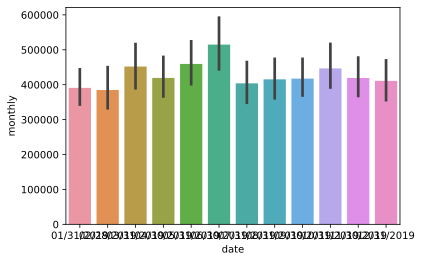

In [65]:
total_traffic_by_month = sns.barplot(x='date', y='monthly', data=station_daily)
total_traffic_by_month.fig.suptitle('test')

<AxesSubplot:xlabel='station', ylabel='monthly'>

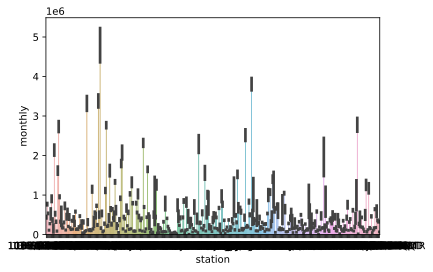

In [61]:
sns.barplot(x='station',y='monthly', data= station_daily)

In [50]:
df2_entries_daily.head(1)

,turnstile,station,date,entries,prev_date,pre_entries,monthly
1,A002R05102-00-00,59 ST,01/31/2019,6928244,01/01/2019,6891983.0,36261.0


In [62]:
df2_entries_daily.groupby('station')['turnstile'].nunique()

station
1 AV               15
103 ST             15
103 ST-CORONA       9
104 ST              9
110 ST              6
                   ..
WOODLAWN            5
WORLD TRADE CTR    18
WTC-CORTLANDT      35
YORK ST             3
ZEREGA AV           6
Name: turnstile, Length: 379, dtype: int64

In [70]:
df2_exits = df2[['turnstile','station','date','time','exits']]
df2_exits.head(1)

,turnstile,station,date,time,exits
18,A002R05102-00-00,59 ST,01/01/2019,03:00:00,2336751


In [71]:
df2_exits_daily = (df2_exits
                    .groupby(['turnstile','station','date'],as_index = False)
                    .exits.first())

In [76]:
df2_exits_daily.head(3)

,turnstile,station,date,exits,prev_date,pre_exits
0,A002R05102-00-00,59 ST,01/01/2019,2336751,NaN,NaN
1,A002R05102-00-00,59 ST,01/31/2019,2349668,01/01/2019,2336751.0
2,A002R05102-00-00,59 ST,02/28/2019,2361132,01/31/2019,2349668.0


In [73]:
df2_exits_daily[['prev_date','pre_exits']] = (df2_exits_daily
                                                  .groupby(['turnstile','station'])['date','exits']
                                                  .apply(lambda grp: grp.shift(1)))

<ipython-input-73-807e2e762e44>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2_exits_daily[['prev_date','pre_exits']] = (df2_exits_daily


In [80]:
def get_daily_counts(row, max_counter):
    counter = row['exits'] - row['pre_exits']
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row['exits'], row['pre_exits'])
    if counter > max_counter:
        return 0
    return counter

df2_exits_daily['monthly'] = df2_exits_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [86]:
df2_exits_daily.head()

,turnstile,station,date,exits,prev_date,pre_exits,monthly
0,A002R05102-00-00,59 ST,01/01/2019,2336751,NaN,NaN,NaN
1,A002R05102-00-00,59 ST,01/31/2019,2349668,01/01/2019,2336751.0,12917.0
2,A002R05102-00-00,59 ST,02/28/2019,2361132,01/31/2019,2349668.0,11464.0
3,A002R05102-00-00,59 ST,03/31/2019,2373867,02/28/2019,2361132.0,12735.0
4,A002R05102-00-00,59 ST,04/30/2019,2385765,03/31/2019,2373867.0,11898.0


In [90]:
df2_exits_daily.dropna(subset=['prev_date'],axis=0,inplace=True)

In [91]:
df2_exits_daily.head(1)

,turnstile,station,date,exits,prev_date,pre_exits,monthly
1,A002R05102-00-00,59 ST,01/31/2019,2349668,01/01/2019,2336751.0,12917.0


In [100]:
df2_entries_daily.head(1)

,turnstile,station,date,entries,prev_date,pre_entries,monthly
1,A002R05102-00-00,59 ST,01/31/2019,6928244,01/01/2019,6891983.0,36261.0


In [103]:
df2_entries_daily.rename(columns = {'monthly':'monthly_entries'},inplace=True)
df2_entries_daily.head(1)

,turnstile,station,date,entries,prev_date,pre_entries,monthly_entries
1,A002R05102-00-00,59 ST,01/31/2019,6928244,01/01/2019,6891983.0,36261.0


In [104]:
df2_exits_daily.rename(columns = {'monthly':'monthly_exits'},inplace=True)

In [276]:
dfu = pd.merge(df2_entries_daily[['turnstile','station','date','monthly_entries']],
                      df2_exits_daily[['turnstile','monthly_exits']],on=['turnstile'])

In [267]:
dfu.date.nunique()

12

## 

In [136]:
dfu['total_monthly'] = dfu.monthly_entries + dfu.monthly_exits

In [139]:
dfu.head(12)

,turnstile,station,date,monthly_entries,monthly_exits,total_monthly
0,A002R05102-00-00,59 ST,01/31/2019,36261.0,12917.0,49178.0
1,A002R05102-00-00,59 ST,01/31/2019,36261.0,11464.0,47725.0
2,A002R05102-00-00,59 ST,01/31/2019,36261.0,12735.0,48996.0
3,A002R05102-00-00,59 ST,01/31/2019,36261.0,11898.0,48159.0
4,A002R05102-00-00,59 ST,01/31/2019,36261.0,12729.0,48990.0
5,A002R05102-00-00,59 ST,01/31/2019,36261.0,11912.0,48173.0
6,A002R05102-00-00,59 ST,01/31/2019,36261.0,9963.0,46224.0
7,A002R05102-00-00,59 ST,01/31/2019,36261.0,12773.0,49034.0
8,A002R05102-00-00,59 ST,01/31/2019,36261.0,11592.0,47853.0
9,A002R05102-00-00,59 ST,01/31/2019,36261.0,12949.0,49210.0


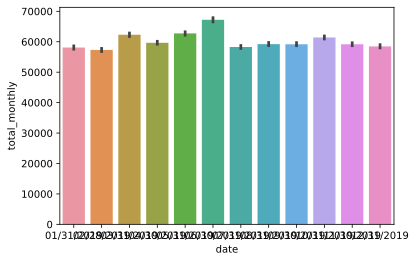

In [155]:
total_traffic_by_month_beta = sns.barplot(x='date', y='total_monthly', data=dfu)

In [146]:
station_totals = dfu.groupby('station')[['station','total_monthly']].sum().reset_index()

In [147]:
station_totals.head()

,station,total_monthly
0,1 AV,117421704.0
1,103 ST,189400920.0
2,103 ST-CORONA,134612484.0
3,104 ST,23216268.0
4,110 ST,76289544.0


In [152]:
station_monthly = dfu.groupby(['station','date'])[['station','date','total_monthly']].sum().reset_index()

In [154]:
station_monthly.head(24)

,station,date,total_monthly
0,1 AV,01/31/2019,11460902.0
1,1 AV,02/28/2019,9250926.0
2,1 AV,03/31/2019,10887142.0
3,1 AV,04/30/2019,11227960.0
4,1 AV,05/31/2019,10707530.0
5,1 AV,06/30/2019,10509996.0
6,1 AV,07/31/2019,10087658.0
7,1 AV,08/31/2019,10020120.0
8,1 AV,09/30/2019,9874436.0
9,1 AV,10/31/2019,10819710.0


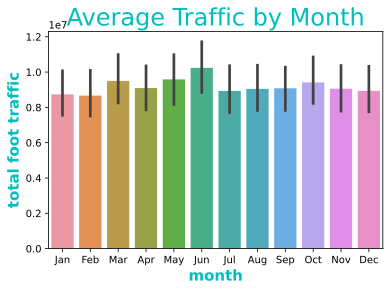

In [262]:
# At this point I thought my data was correct, but my original dfu table was merged incorrectly
#I did no specify turnstile AND date, and there was multiple exit totals for the same enty total

#months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#total_traffic_by_month = sns.barplot(x='date', y='total_monthly', data=station_monthly)
#plt.title('Average Traffic by Month', fontsize= 24, color='c')
#total_traffic_by_month.set_xticklabels(months)
#plt.xlabel('month', color='c', size = 15, fontweight='bold')
#plt.ylabel('total foot traffic', color='c', size= 15, fontweight='bold')
#total_traffic_by_month.figure.savefig('average_traffic_month.svg')

In [186]:
station_total = station_monthly.groupby('station')[['station','total_monthly']].sum()

In [273]:
station_total.head()

,total_monthly
station,
1 AV,117421704.0
103 ST,189400920.0
103 ST-CORONA,134612484.0
104 ST,23216268.0
110 ST,76289544.0


In [194]:
dfu.sort_values('total_monthly')

,turnstile,station,date,monthly_entries,monthly_exits,total_monthly
690110,TRAM2R46900-05-01,RIT-ROOSEVELT,12/31/2019,0.0,0.0,0.0
431041,R101R00102-06-03,SOUTH FERRY,03/31/2019,0.0,0.0,0.0
431042,R101R00102-06-03,SOUTH FERRY,03/31/2019,0.0,0.0,0.0
431044,R101R00102-06-03,SOUTH FERRY,04/30/2019,0.0,0.0,0.0
431048,R101R00102-06-03,SOUTH FERRY,04/30/2019,0.0,0.0,0.0
...,...,...,...,...,...,...
198241,N094R02901-00-03,WORLD TRADE CTR,08/31/2019,932039.0,622125.0,1554164.0
402386,PTH10R54700-00-02,9TH STREET,06/30/2019,823136.0,826522.0,1649658.0
603726,R417R22200-00-04,PARKCHESTER,01/31/2019,658892.0,993788.0,1652680.0
366702,N601R31900-03-00,LEXINGTON AV/63,01/31/2019,814447.0,853669.0,1668116.0


In [209]:
dfu.drop(dfu.loc[(dfu.monthly_entries == 0)|(dfu.monthly_exits == 0)],index=True)

ValueError: Cannot specify both 'labels' and 'index'/'columns'

In [203]:
dfu.tail

,turnstile,station,date,monthly_entries,monthly_exits,total_monthly
690106,TRAM2R46900-05-01,RIT-ROOSEVELT,12/31/2019,0.0,3.0,3.0
690107,TRAM2R46900-05-01,RIT-ROOSEVELT,12/31/2019,0.0,31.0,31.0
690108,TRAM2R46900-05-01,RIT-ROOSEVELT,12/31/2019,0.0,0.0,0.0
690109,TRAM2R46900-05-01,RIT-ROOSEVELT,12/31/2019,0.0,0.0,0.0
690110,TRAM2R46900-05-01,RIT-ROOSEVELT,12/31/2019,0.0,0.0,0.0


In [212]:
dfu.drop(dfu.loc[(dfu.monthly_entries == 0)])

KeyError: "['turnstile' 'station' 'date' 'monthly_entries' 'monthly_exits'\n 'total_monthly'] not found in axis"

In [220]:
zero_mask = (dfu.monthly_entries == 0) & (dfu.monthly_exits == 0)

In [223]:
dfu[zero_mask].head() #wtf

,turnstile,station,date,monthly_entries,monthly_exits,total_monthly
1447,A002R05102-05-01,59 ST,01/31/2019,0.0,0.0,0.0
1459,A002R05102-05-01,59 ST,02/28/2019,0.0,0.0,0.0
1471,A002R05102-05-01,59 ST,03/31/2019,0.0,0.0,0.0
1483,A002R05102-05-01,59 ST,04/30/2019,0.0,0.0,0.0
1495,A002R05102-05-01,59 ST,05/31/2019,0.0,0.0,0.0


In [217]:
dfu

,turnstile,station,date,monthly_entries,monthly_exits,total_monthly
0,A002R05102-00-00,59 ST,01/31/2019,36261.0,12917.0,49178.0
1,A002R05102-00-00,59 ST,01/31/2019,36261.0,11464.0,47725.0
2,A002R05102-00-00,59 ST,01/31/2019,36261.0,12735.0,48996.0
3,A002R05102-00-00,59 ST,01/31/2019,36261.0,11898.0,48159.0
4,A002R05102-00-00,59 ST,01/31/2019,36261.0,12729.0,48990.0
...,...,...,...,...,...,...
690106,TRAM2R46900-05-01,RIT-ROOSEVELT,12/31/2019,0.0,3.0,3.0
690107,TRAM2R46900-05-01,RIT-ROOSEVELT,12/31/2019,0.0,31.0,31.0
690108,TRAM2R46900-05-01,RIT-ROOSEVELT,12/31/2019,0.0,0.0,0.0
690109,TRAM2R46900-05-01,RIT-ROOSEVELT,12/31/2019,0.0,0.0,0.0


In [243]:
whos

Variable                      Type           Data/Info
------------------------------------------------------
cols                          list           n=12
df                            DataFrame                  ca  unit     <...>667721 rows x 12 columns]
df2                           DataFrame                       turnstil<...>378375 rows x 13 columns]
df2_entries                   DataFrame                       turnstil<...>[378375 rows x 5 columns]
df2_entries_daily             DataFrame                     turnstile <...>n[58177 rows x 7 columns]
df2_exits                     DataFrame                       turnstil<...>[378375 rows x 5 columns]
df2_exits_daily               DataFrame                     turnstile <...>n[58177 rows x 7 columns]
df_ultimate                   DataFrame                      turnstile<...>[690111 rows x 5 columns]
dfu                           DataFrame                      turnstile<...>[690111 rows x 6 columns]
dt                            mo

In [266]:
dfu.head(2)

,turnstile,station,date,monthly_entries,monthly_exits,total_monthly
0,A002R05102-00-00,59 ST,01/31/2019,36261.0,12917.0,49178.0
1,A002R05102-00-00,59 ST,01/31/2019,36261.0,11464.0,47725.0


In [268]:
dfu.shape

(690111, 6)

In [271]:
df2_entries_daily.shape

(58177, 7)

In [272]:
df2_exits_daily.shape

(58177, 7)

In [278]:
df2_entries_daily.head()

,turnstile,station,date,entries,prev_date,pre_entries,monthly_entries
1,A002R05102-00-00,59 ST,01/31/2019,6928244,01/01/2019,6891983.0,36261.0
2,A002R05102-00-00,59 ST,02/28/2019,6960690,01/31/2019,6928244.0,32446.0
3,A002R05102-00-00,59 ST,03/31/2019,6999957,02/28/2019,6960690.0,39267.0
4,A002R05102-00-00,59 ST,04/30/2019,7038242,03/31/2019,6999957.0,38285.0
5,A002R05102-00-00,59 ST,05/31/2019,7078470,04/30/2019,7038242.0,40228.0


In [280]:
df2_entries_daily['monthly_exits'] = df2_exits_daily.monthly_exits

In [282]:
df2_entries_daily.head(3)

,turnstile,station,date,entries,prev_date,pre_entries,monthly_entries,monthly_exits
1,A002R05102-00-00,59 ST,01/31/2019,6928244,01/01/2019,6891983.0,36261.0,12917.0
2,A002R05102-00-00,59 ST,02/28/2019,6960690,01/31/2019,6928244.0,32446.0,11464.0
3,A002R05102-00-00,59 ST,03/31/2019,6999957,02/28/2019,6960690.0,39267.0,12735.0


In [283]:
df2_exits_daily.head(3)

,turnstile,station,date,exits,prev_date,pre_exits,monthly_exits
1,A002R05102-00-00,59 ST,01/31/2019,2349668,01/01/2019,2336751.0,12917.0
2,A002R05102-00-00,59 ST,02/28/2019,2361132,01/31/2019,2349668.0,11464.0
3,A002R05102-00-00,59 ST,03/31/2019,2373867,02/28/2019,2361132.0,12735.0


In [284]:
#reseting dfu (dfultimate) with correct values
dfu = df2_entries_daily[['turnstile','station','date','monthly_entries','monthly_exits']]

In [285]:
dfu

,turnstile,station,date,monthly_entries,monthly_exits
1,A002R05102-00-00,59 ST,01/31/2019,36261.0,12917.0
2,A002R05102-00-00,59 ST,02/28/2019,32446.0,11464.0
3,A002R05102-00-00,59 ST,03/31/2019,39267.0,12735.0
4,A002R05102-00-00,59 ST,04/30/2019,38285.0,11898.0
5,A002R05102-00-00,59 ST,05/31/2019,40228.0,12729.0
...,...,...,...,...,...
63157,TRAM2R46900-05-01,RIT-ROOSEVELT,08/31/2019,0.0,3.0
63158,TRAM2R46900-05-01,RIT-ROOSEVELT,09/30/2019,0.0,31.0
63159,TRAM2R46900-05-01,RIT-ROOSEVELT,10/31/2019,0.0,0.0
63160,TRAM2R46900-05-01,RIT-ROOSEVELT,11/30/2019,0.0,0.0


In [286]:
dfu['monthly_total'] = dfu.monthly_entries + dfu.monthly_exits

<ipython-input-286-887ad560ea0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfu['monthly_total'] = dfu.monthly_entries + dfu.monthly_exits


In [287]:
dfu.head(3)

,turnstile,station,date,monthly_entries,monthly_exits,monthly_total
1,A002R05102-00-00,59 ST,01/31/2019,36261.0,12917.0,49178.0
2,A002R05102-00-00,59 ST,02/28/2019,32446.0,11464.0,43910.0
3,A002R05102-00-00,59 ST,03/31/2019,39267.0,12735.0,52002.0


In [289]:
station_monthly = dfu.groupby(['station','date'])[['station','date','monthly_total']].sum().reset_index()

In [290]:
station_monthly.head()

,station,date,monthly_total
0,1 AV,01/31/2019,1140540.0
1,1 AV,02/28/2019,741828.0
2,1 AV,03/31/2019,1010731.0
3,1 AV,04/30/2019,1093729.0
4,1 AV,05/31/2019,1012930.0


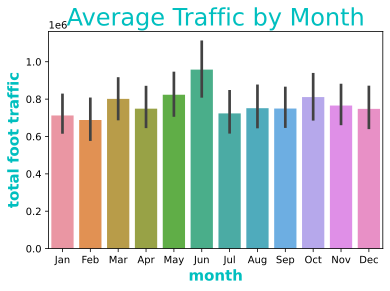

In [292]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
total_traffic_by_month = sns.barplot(x='date', y='monthly_total', data=station_monthly)
plt.title('Average Traffic by Month', fontsize= 24, color='c')
total_traffic_by_month.set_xticklabels(months)
plt.xlabel('month', color='c', size = 15, fontweight='bold')
plt.ylabel('total foot traffic', color='c', size= 15, fontweight='bold')
total_traffic_by_month.figure.savefig('average_traffic_month.svg')

In [302]:
station_monthly.head()

,station,date,monthly_total
0,1 AV,01/31/2019,1140540.0
1,1 AV,02/28/2019,741828.0
2,1 AV,03/31/2019,1010731.0
3,1 AV,04/30/2019,1093729.0
4,1 AV,05/31/2019,1012930.0


In [306]:
station_total = station_monthly.groupby('station')[['station','monthly_total']].sum().reset_index()

In [307]:
top10 = station_total.sort_values('monthly_total',ascending=False).head(10)

In [317]:
bot10 = station_total.sort_values('monthly_total',ascending=True).head(10)

In [308]:
station_total.tail(10)

,station,monthly_total
369,WHITEHALL S-FRY,10732302.0
370,WHITLOCK AV,1239968.0
371,WILSON AV,2523632.0
372,WINTHROP ST,2324374.0
373,WOODHAVEN BLVD,12438354.0
374,WOODLAWN,2646985.0
375,WORLD TRADE CTR,11765502.0
376,WTC-CORTLANDT,8464508.0
377,YORK ST,5893173.0
378,ZEREGA AV,1543405.0


In [312]:
top10

,station,monthly_total
61,34 ST-PENN STA,108062601.0
233,GRD CNTRL-42 ST,91351243.0
59,34 ST-HERALD SQ,77295124.0
46,23 ST,69975570.0
353,TIMES SQ-42 ST,63320605.0
14,14 ST-UNION SQ,62155700.0
68,42 ST-PORT AUTH,60056801.0
226,FULTON ST,58415003.0
110,86 ST,53274645.0
173,CANAL ST,48232767.0


In [319]:
bot10

,station,monthly_total
309,ORCHARD BEACH,10638.0
162,BROAD CHANNEL,121589.0
141,BEACH 105 ST,191633.0
354,TOMPKINSVILLE,215818.0
148,BEACH 98 ST,336146.0
333,ROCKAWAY PARK B,519667.0
292,NEPTUNE AV,605574.0
143,BEACH 36 ST,627782.0
147,BEACH 90 ST,649681.0
144,BEACH 44 ST,660376.0


In [316]:
top_list = list(top10.station)
top_list

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 'TIMES SQ-42 ST',
 '14 ST-UNION SQ',
 '42 ST-PORT AUTH',
 'FULTON ST',
 '86 ST',
 'CANAL ST']

In [320]:
bot_list = list(bot10.station)

In [326]:
station_monthly

,station,date,monthly_total
0,1 AV,01/31/2019,1140540.0
1,1 AV,02/28/2019,741828.0
2,1 AV,03/31/2019,1010731.0
3,1 AV,04/30/2019,1093729.0
4,1 AV,05/31/2019,1012930.0
...,...,...,...
4520,ZEREGA AV,08/31/2019,126858.0
4521,ZEREGA AV,09/30/2019,128906.0
4522,ZEREGA AV,10/31/2019,140334.0
4523,ZEREGA AV,11/30/2019,135729.0


In [332]:
top10_total = station_monthly[station_monthly.station.isin (top_list)]

In [333]:
bot10_total = station_monthly[station_monthly.station.isin(bot_list)]

In [334]:
bot10_total

,station,date,monthly_total
1680,BEACH 105 ST,01/31/2019,10994.0
1681,BEACH 105 ST,02/28/2019,9994.0
1682,BEACH 105 ST,03/31/2019,12804.0
1683,BEACH 105 ST,04/30/2019,11914.0
1684,BEACH 105 ST,05/31/2019,16788.0
...,...,...,...
4232,TOMPKINSVILLE,08/31/2019,17210.0
4233,TOMPKINSVILLE,09/30/2019,16558.0
4234,TOMPKINSVILLE,10/31/2019,18342.0
4235,TOMPKINSVILLE,11/30/2019,15477.0


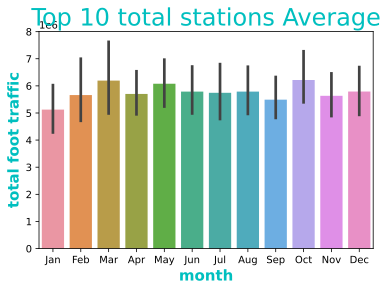

In [341]:
total_traffic_by_month = sns.barplot(x='date', y='monthly_total', data=top10_total)
plt.title('Top 10 total stations Average', fontsize= 24, color='c')
total_traffic_by_month.set_xticklabels(months)
plt.xlabel('month', color='c', size = 15, fontweight='bold')
plt.ylabel('total foot traffic', color='c', size= 15, fontweight='bold')
total_traffic_by_month.figure.savefig('top10_avg.svg')


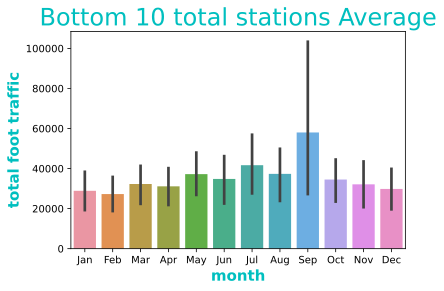

In [342]:
total_traffic_by_month = sns.barplot(x='date', y='monthly_total', data=bot10_total)
plt.title('Bottom 10 total stations Average', fontsize= 24, color='c')
total_traffic_by_month.set_xticklabels(months)
plt.xlabel('month', color='c', size = 15, fontweight='bold')
plt.ylabel('total foot traffic', color='c', size= 15, fontweight='bold')
total_traffic_by_month.figure.savefig('bot10_avg.svg')



In [352]:
dfu.groupby(['station'])[['turnstile']].nunique().sort_values('turnstile',ascending=False).tail(20)

,turnstile
station,
CRESCENT ST,3
CYPRESS HILLS,3
BUSHWICK AV,3
NORWOOD AV,3
BURKE AV,3
NEW LOTS,3
225 ST,3
BROAD CHANNEL,3
NEREID AV,3


In [354]:
dfu.plot.pie(x='station',y='monthly_total')

<AxesSubplot:ylabel='monthly_total'>

Error in callback <function flush_figures at 0x7fcc8e965ee0> (for post_execute):


KeyboardInterrupt: 

In [356]:
def getpercent(part, whole):
    return 100*(float(part)/float(whole))

In [365]:
total_overall_traffic = dfu.monthly_total.sum()

In [366]:
total_overall_traffic

3499711133.0

In [367]:
top10_overall_total = top10.monthly_total.sum()

In [368]:
bot10_overall_total = bot10.monthly_total.sum()

In [370]:
getpercent(top10_overall_total,total_overall_traffic)

19.77706252592019

In [372]:
getpercent(bot10_overall_total,total_overall_traffic)

0.11254940337385841

<bound method IndexOpsMixin.nunique of 1         A002R05102-00-00
2         A002R05102-00-00
3         A002R05102-00-00
4         A002R05102-00-00
5         A002R05102-00-00
               ...        
63157    TRAM2R46900-05-01
63158    TRAM2R46900-05-01
63159    TRAM2R46900-05-01
63160    TRAM2R46900-05-01
63161    TRAM2R46900-05-01
Name: turnstile, Length: 58177, dtype: object>

In [381]:
turn_numbers = dfu.groupby('station')[['turnstile']].nunique().sort_values('turnstile', ascending=False)

In [387]:
dfu.groupby('station')[['station','turnstile']].nunique()>20

,station,turnstile
station,,
1 AV,False,False
103 ST,False,False
103 ST-CORONA,False,False
104 ST,False,False
110 ST,False,False
...,...,...
WOODLAWN,False,False
WORLD TRADE CTR,False,False
WTC-CORTLANDT,False,True


In [395]:
dfu.groupby('station')[['turnstile']].nunique().sort_values('turnstile', ascending=False).head(20)

,turnstile
station,
34 ST-PENN STA,100
FULTON ST,96
GRD CNTRL-42 ST,74
23 ST,73
86 ST,63
CHAMBERS ST,59
CANAL ST,58
59 ST,57
34 ST-HERALD SQ,54


In [396]:
dfu.groupby('station')[['turnstile']].nunique().sort_values('turnstile', ascending=False).tail(20)

,turnstile
station,
CRESCENT ST,3
CYPRESS HILLS,3
BUSHWICK AV,3
NORWOOD AV,3
BURKE AV,3
NEW LOTS,3
225 ST,3
BROAD CHANNEL,3
NEREID AV,3


In [ ]:
plt.pie()